# Hypothesis Testing with Insurance Data (Core)

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance="insurance - insurance.csv"
df = pd.read_csv(insurance)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference between Smokers and Non-Smokers insurance Charges.
        
 -(Alternative Hypothesis): There is a significant difference between Smokers and Non-Smokers insurance Charges.

In [4]:
## create a column that easily separates our groups
df['no_smoker']= df['smoker'].str.contains('no', case=False)
df

,age,sex,bmi,children,smoker,region,charges,no_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,True
1335,18,female,36.850,0,no,southeast,1629.83350,True
1336,21,female,25.800,0,no,southwest,2007.94500,True


In [5]:
## save list of columns needed for each group
needed_cols = ['no_smoker','smoker','charges']

df[needed_cols]

,no_smoker,smoker,charges
0,False,yes,16884.92400
1,True,no,1725.55230
2,True,no,4449.46200
3,True,no,21984.47061
4,True,no,3866.85520
...,...,...,...
1333,True,no,10600.54830
1334,True,no,2205.98080
1335,True,no,1629.83350
1336,True,no,2007.94500


In [6]:
## save discount in separate variable
no_smoker_df = df.loc[df['no_smoker']==True, needed_cols]
no_smoker_df

,no_smoker,smoker,charges
1,True,no,1725.55230
2,True,no,4449.46200
3,True,no,21984.47061
4,True,no,3866.85520
5,True,no,3756.62160
...,...,...,...
1332,True,no,11411.68500
1333,True,no,10600.54830
1334,True,no,2205.98080
1335,True,no,1629.83350


In [7]:
smoker_df = df.loc[df['no_smoker']==False, needed_cols]
smoker_df

,no_smoker,smoker,charges
0,False,yes,16884.92400
11,False,yes,27808.72510
14,False,yes,39611.75770
19,False,yes,36837.46700
23,False,yes,37701.87680
...,...,...,...
1313,False,yes,36397.57600
1314,False,yes,18765.87545
1321,False,yes,28101.33305
1323,False,yes,43896.37630


In [8]:
## Separate the column of interest based on the groups
no_smoker_df = df.loc[ df['no_smoker']==False, ['charges','no_smoker']]
smoker_df = df.loc[ df['no_smoker']==True, ['charges','no_smoker']]
print(f"There are {len(no_smoker_df)} have no smokers." )
print(f"There are {len(smoker_df)} have smokers." )

There are 274 have no smokers.
There are 1064 have smokers.


In [9]:
# Build groups
no_smoker_group = no_smoker_df['charges']
smoker_group = smoker_df['charges']
display(no_smoker_group.head(), smoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### This is numeric 2 Sample question.

- Check No Significant Outliers
- Check Normality
- Check Equal Variance

#### Check for Outliers

In [10]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_no_smoker = np.abs(stats.zscore(no_smoker_group)) > 3
print(f"There are {is_outlier_no_smoker.sum()} outliers in the No smoker group out of {len(no_smoker_group)})")

There are 0 outliers in the No smoker group out of 274)


In [11]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group of out of {len(smoker_group)}.")

There are 24 outliers in the smoker group of out of 1064.


In [12]:
## removing outliers from smoker_group
smoker_group = smoker_group.loc[~is_outlier_smoker]
smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Check for Normality

- according to the Learning Platform since both groups a . 15 it is safe to ignore the assumption of normalcy.

#### Checking for Equal Variance

In [13]:
result = stats.levene(smoker_group, no_smoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


#### -According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

#### -Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

#### Statistical Test

In [14]:
result = stats.ttest_ind(smoker_group, no_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

In [15]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([smoker_df.loc[~is_outlier_smoker], 
                     no_smoker_df.loc[~is_outlier_no_smoker]], axis=0)
plot_df

,charges,no_smoker
1,1725.55230,True
2,4449.46200,True
3,21984.47061,True
4,3866.85520,True
5,3756.62160,True
...,...,...
1313,36397.57600,False
1314,18765.87545,False
1321,28101.33305,False
1323,43896.37630,False


<AxesSubplot: xlabel='no_smoker', ylabel='charges'>

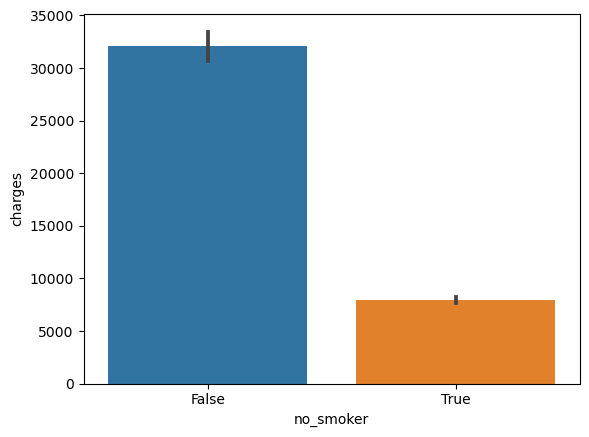

In [16]:
sns.barplot(data=plot_df, x='no_smoker',y='charges')

### Answer for Q1 question

- The testing has verifies that I must reject the null hypothesis and support the alternative hypothesis.

- There is a clear difference between the two groups.

## Q2. Are men more likely to smoke than women?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference between the amount of smokers that are men or women.
        
 -(Alternative Hypothesis): There is a significant difference between the amount of smokers that are men or women.

In [17]:
## Create a column that defines the 2 groups, has female or not
df['has_female'] = df['sex'].str.contains('female', case=False)
df

,age,sex,bmi,children,smoker,region,charges,no_smoker,has_female
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,True
1335,18,female,36.850,0,no,southeast,1629.83350,True,True
1336,21,female,25.800,0,no,southwest,2007.94500,True,True


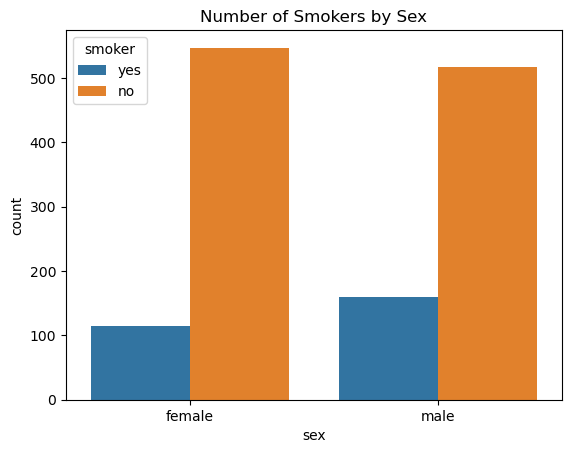

In [18]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [19]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


Checking Assumptions of Chi-square
According the the work flow, the Chi_square test has the following assumptions:

-There are two categorical variables (ordinal or nominal)
 - I believe this is an ordinal question because we are looking for the smokers difference between male and female clients.

-The outcomes are independent

In [20]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [21]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

### Answer for Q2 

- The p value is < 0.05 this mean that will be rejecting my null hypothesis and support the alternative hypothesis for this question.

- You can see a significant difference between both groups.

## Q3. Do different regions have different charges, on average?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference in charges between the regions.
        
 -(Alternative Hypothesis): There is a significant difference in charges between the regions.

In [22]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [23]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [24]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [25]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

### This is numeric more than 2Sample question.
#### The One Way ANOVA test would be the best test for this question

-No significant outliers

-Equal variance

-Normality

In [26]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

#### The resulting p-value is below 0.05 and per the learning platform I must reject the null hypothesis for all the regions.

#### I did not run the Kruskal_Wallis test because the learning platform said it was nonparametric tests like median and I am looking for the means which is a Parametric test.

#### Tukey's Pairwise Multiple Comparisons Test

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [28]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


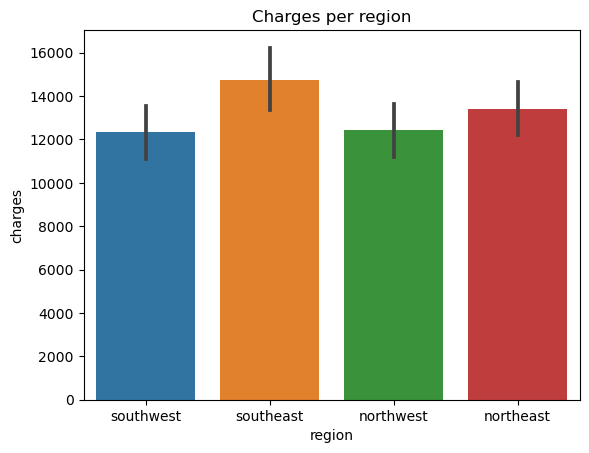

In [31]:
ax = sns.barplot(data=df, x='region',y='charges')
ax.set_title("Charges per region");

### Doing these test give significant result for the rejection of the null hypothesis. You can see a different in all the regions but less on the one between the northwest and southwest regions. In all they all show a difference and have validated the original decision.